<a href="https://colab.research.google.com/github/Gehlen05/modelos-deteccao-fraude/blob/main/rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ast import increment_lineno
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/POS_COMPUTACAO/TCC/PI_2/treinamento_modelos/creditcard_normalizado.csv')
df.head()

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 30, activation='relu', input_shape=(30,)))
rede_neural.add(tf.keras.layers.Dense(units = 30, activation='relu'))
rede_neural.add(tf.keras.layers.Dropout(0.2))
rede_neural.add(tf.keras.layers.Dense(units = 30, activation='relu'))
rede_neural.add(tf.keras.layers.Dropout(0.2))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = rede_neural.fit(x_train, y_train, epochs=30)

Epoch 1/30
7121/7121 [==============================] - 29s 4ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 2/30
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 3/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 4/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 5/30
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 6/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 7/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 8/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/30
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 10/30
7121/7121 [==============================] - 27s 4ms/step - l

In [ ]:
y_pred_test = rede_neural.predict(x_test)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
meu_arquivo = open('modelo_rede_neural_30_30_dropout_treinamento_30.pkl',  'wb')

pickle.dump(rede_neural, meu_arquivo)
meu_arquivo.close()

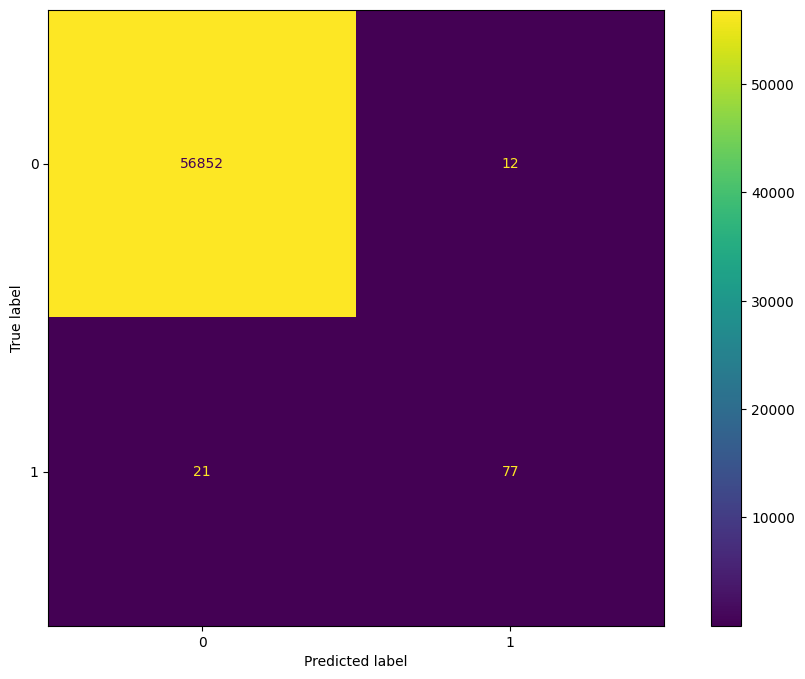

In [ ]:
y_pred_test_binario = (y_pred_test>0.5)
cm = confusion_matrix(y_test, y_pred_test_binario)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred_test_binario))

Acurácia:  0.9995084442259752


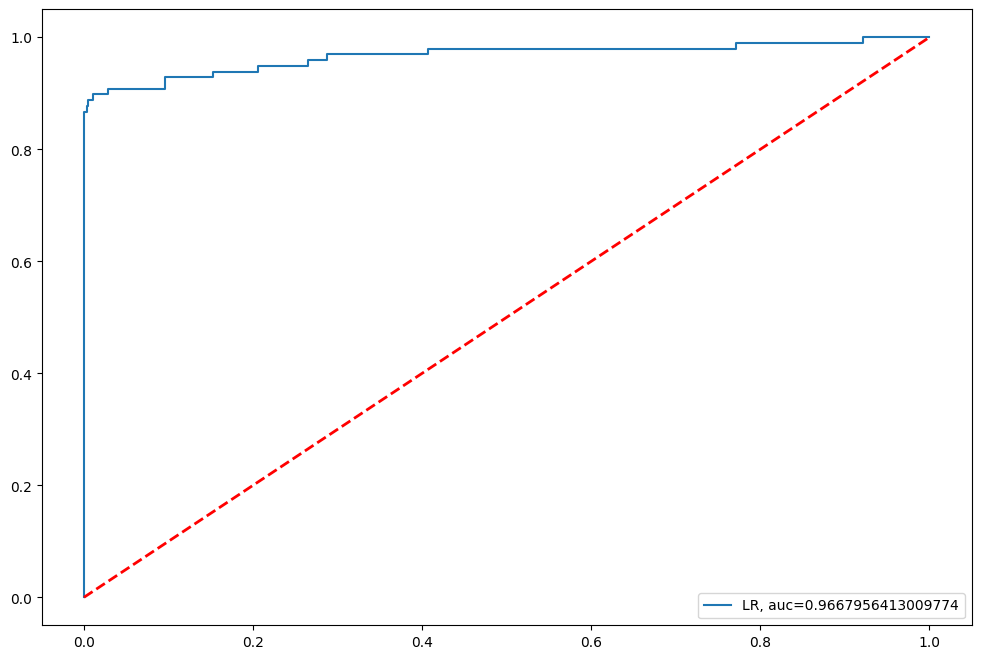

In [ ]:

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label ="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle ='--')
plt.legend(loc=4)



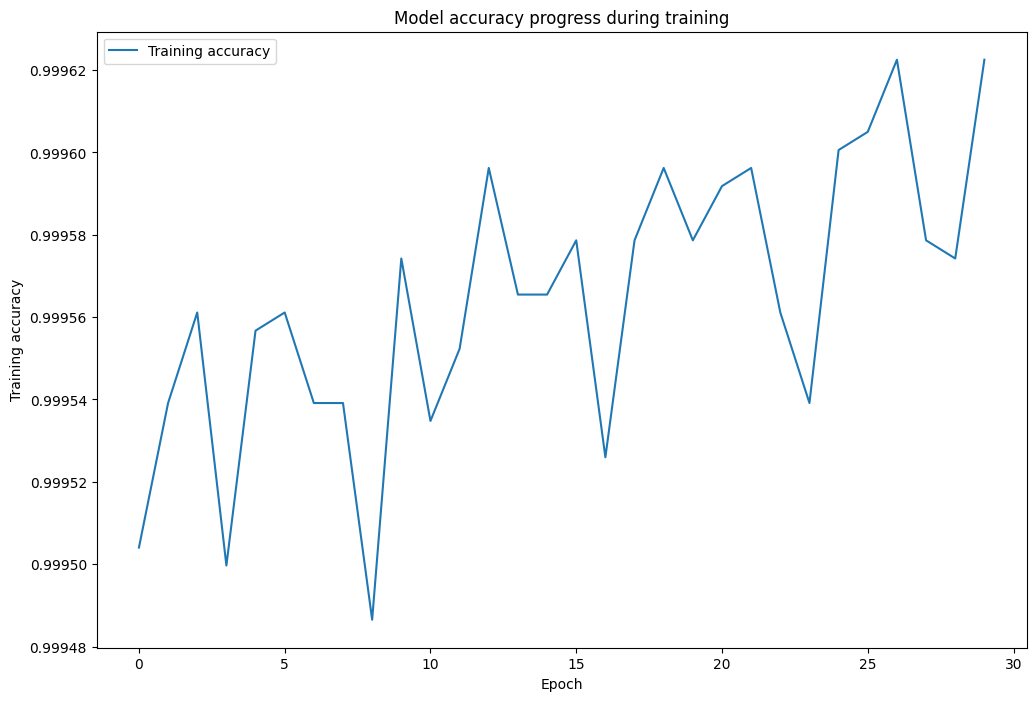

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

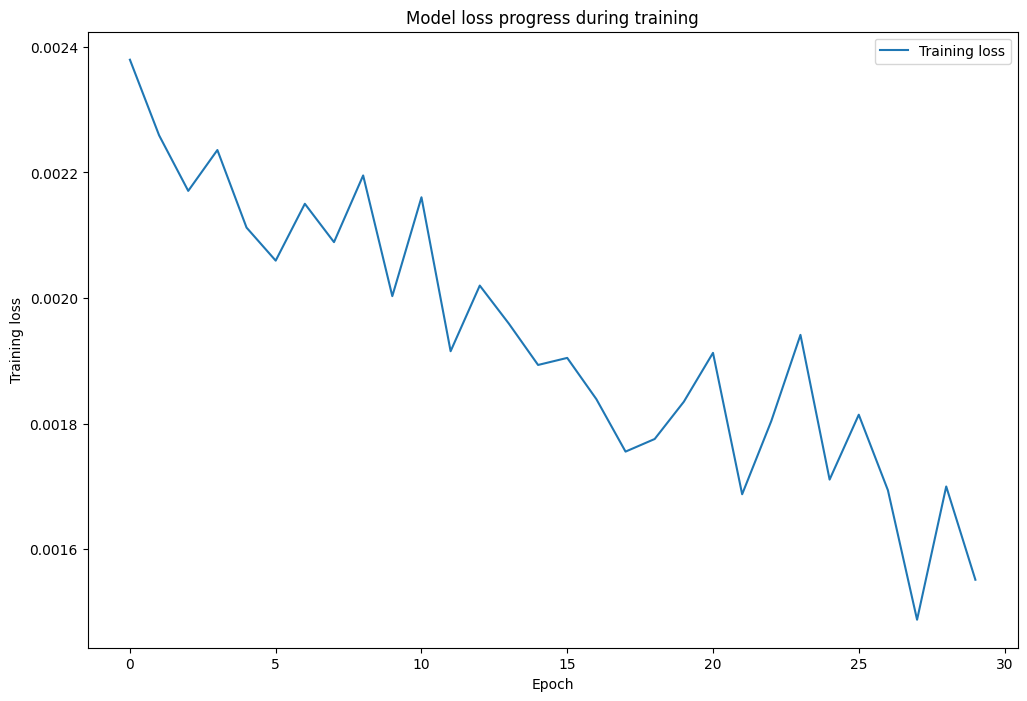

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])